![](s2.jpg)

<b>K-means clustering :</b>
    <br>
         &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; K-means clustering algorithm tries to group similar items in the form of clusters. It finds the similarity between items and groups them into clusters. As the name suggests, the number of clusters is represented by K.
            </font>

## Importing required libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

## Analysis of Data 

In [4]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## Finding the optimal Number of clusters 

In [9]:
features = data.iloc[:, [0, 1, 2, 3]].values

In [10]:
sumOfSqrs = [] #Sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features)
    sumOfSqrs.append(kmeans.inertia_)

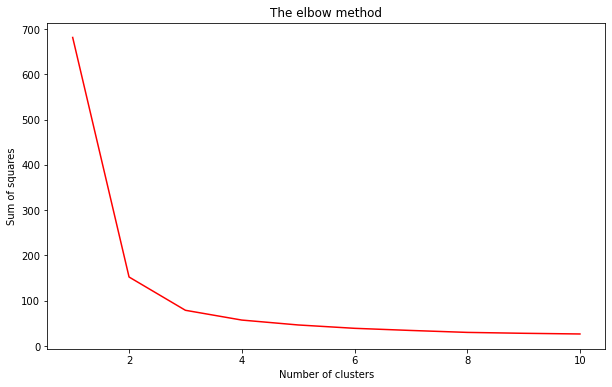

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sumOfSqrs, color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares') 
plt.show()

#### From the above graph, we can infer that the optimal number of clusters would be 3

##  Applying K-means clustering

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(features)

In [15]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

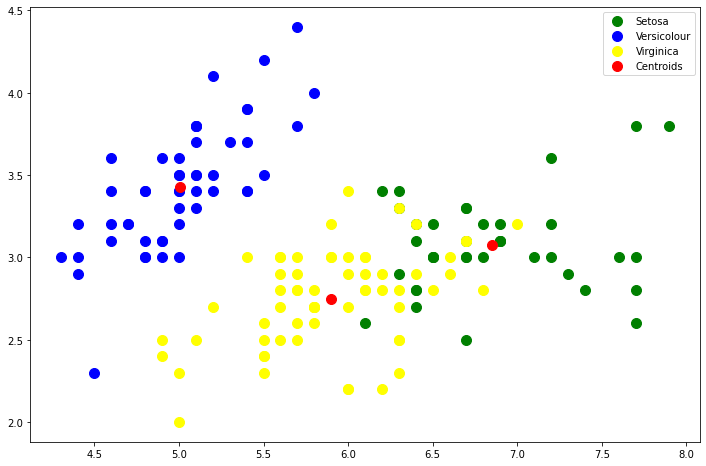

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Setosa')
plt.scatter(features[y_kmeans == 1, 0], features[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Versicolour')
plt.scatter(features[y_kmeans == 2, 0], features[y_kmeans == 2, 1],s = 100, c = 'yellow', label = 'Virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],  s = 100, c = 'red', label = 'Centroids')
plt.legend()